# PLOTLY - Open Source Graphing Library for Python

https://plotly.com/python/

https://plotly.com/python/imshow/

https://plotly.com/python-api-reference

https://www.tutorialspoint.com/plotly/plotly_quick_guide.htm

In [1]:
# !pip install plotly
# !pip install dash #reaktif web uygulamaları oluşturmak için geliştirilmiştir.dash board
# !pip install wordcloud #özellikle kelime bulutu nlp alanında kullanılabilir bir kelimenin önemi için
# !pip install cufflinks #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
# !pip install missingno #kayıp verileri görselleştirmek için

In [2]:
# pip show plotly

In [1]:
from plotly.offline import init_notebook_mode, iplot, plot 

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os 

# plotly

import plotly as py
init_notebook_mode(connected = True) #inline olarak görüntülemek için başlatıyoruz same to = %matplotlib inline

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

#!pip install dash
from dash import Dash, dcc, html, Input, Output #dcc interaktiflik kazandırıyor, 

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf #pandas kütüphanesi ile çalışabilen bir kütüphanedir.
cf.go_offline() #grafikleri offline olarak yapıyoruz

# warnings
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import init_notebook_mode, iplot, plot

## Submodules

plotly.express :Plotly Express, high-level interface for data visualization

plotly.graph_objects :Graph Objects, low-level interface to figures, traces and layout

plotly.subplots : Subplots, helper function for layout out multi-plot figures ""

plotly.figure_factory : Figure Factories, helper methods for building specific complex charts ""

plotly.io : I/O, low-level interface for displaying, reading and writing figures

plotly.colors: colorscales and utility functions

plotly.data: built-in datasets for demonstration, educational and test purposes

In [5]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [6]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [7]:
timesData.sample(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2558,601-800,University of Silesia in Katowice,Poland,17.7,18.5,8.0,20.4,28.1,-,"32,764",17.3,1%,65 : 35,2016
2173,351-400,University of Modena and Reggio Emilia,Italy,18.7,34.2,15.6,72.9,32.3,-,"19,693",25.3,6%,54 : 46,2016
37,38,Washington University in St Louis,United States of America,58.9,56.4,63.0,88.6,-,69.9,"12,528",5.7,17%,NaN,2011
1424,23,University of Tokyo,Japan,81.4,32.4,85.1,74.7,51.2,76.1,"26,199",5.7,10%,NaN,2015
1487,86,University of Arizona,United States of America,44.9,38.8,51.4,74.0,99.6,56.5,"36,429",12.7,8%,52 : 48,2015
257,58,University of Sydney,Australia,55.4,88.1,65.7,57.2,92.1,62.4,"41,868",20.2,28%,57 : 43,2012
2433,601-800,Capital Medical University,China,26.3,18.8,14.9,16.3,28.8,-,"11,506",7.1,3%,70 : 30,2016
1687,276-300,Shanghai Jiao Tong University,China,37.9,23.9,37.9,38.9,88.4,-,"38,191",12.8,6%,37 : 63,2015
1233,226-250,Queen’s University,Canada,36.2,59.8,29.5,51.6,63.5,-,"20,488",22.1,10%,58 : 42,2014
2140,301-350,University of Southern Denmark,Denmark,19.2,71.8,14.7,79.7,28.0,-,"22,210",12.7,16%,52 : 48,2016


In [8]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


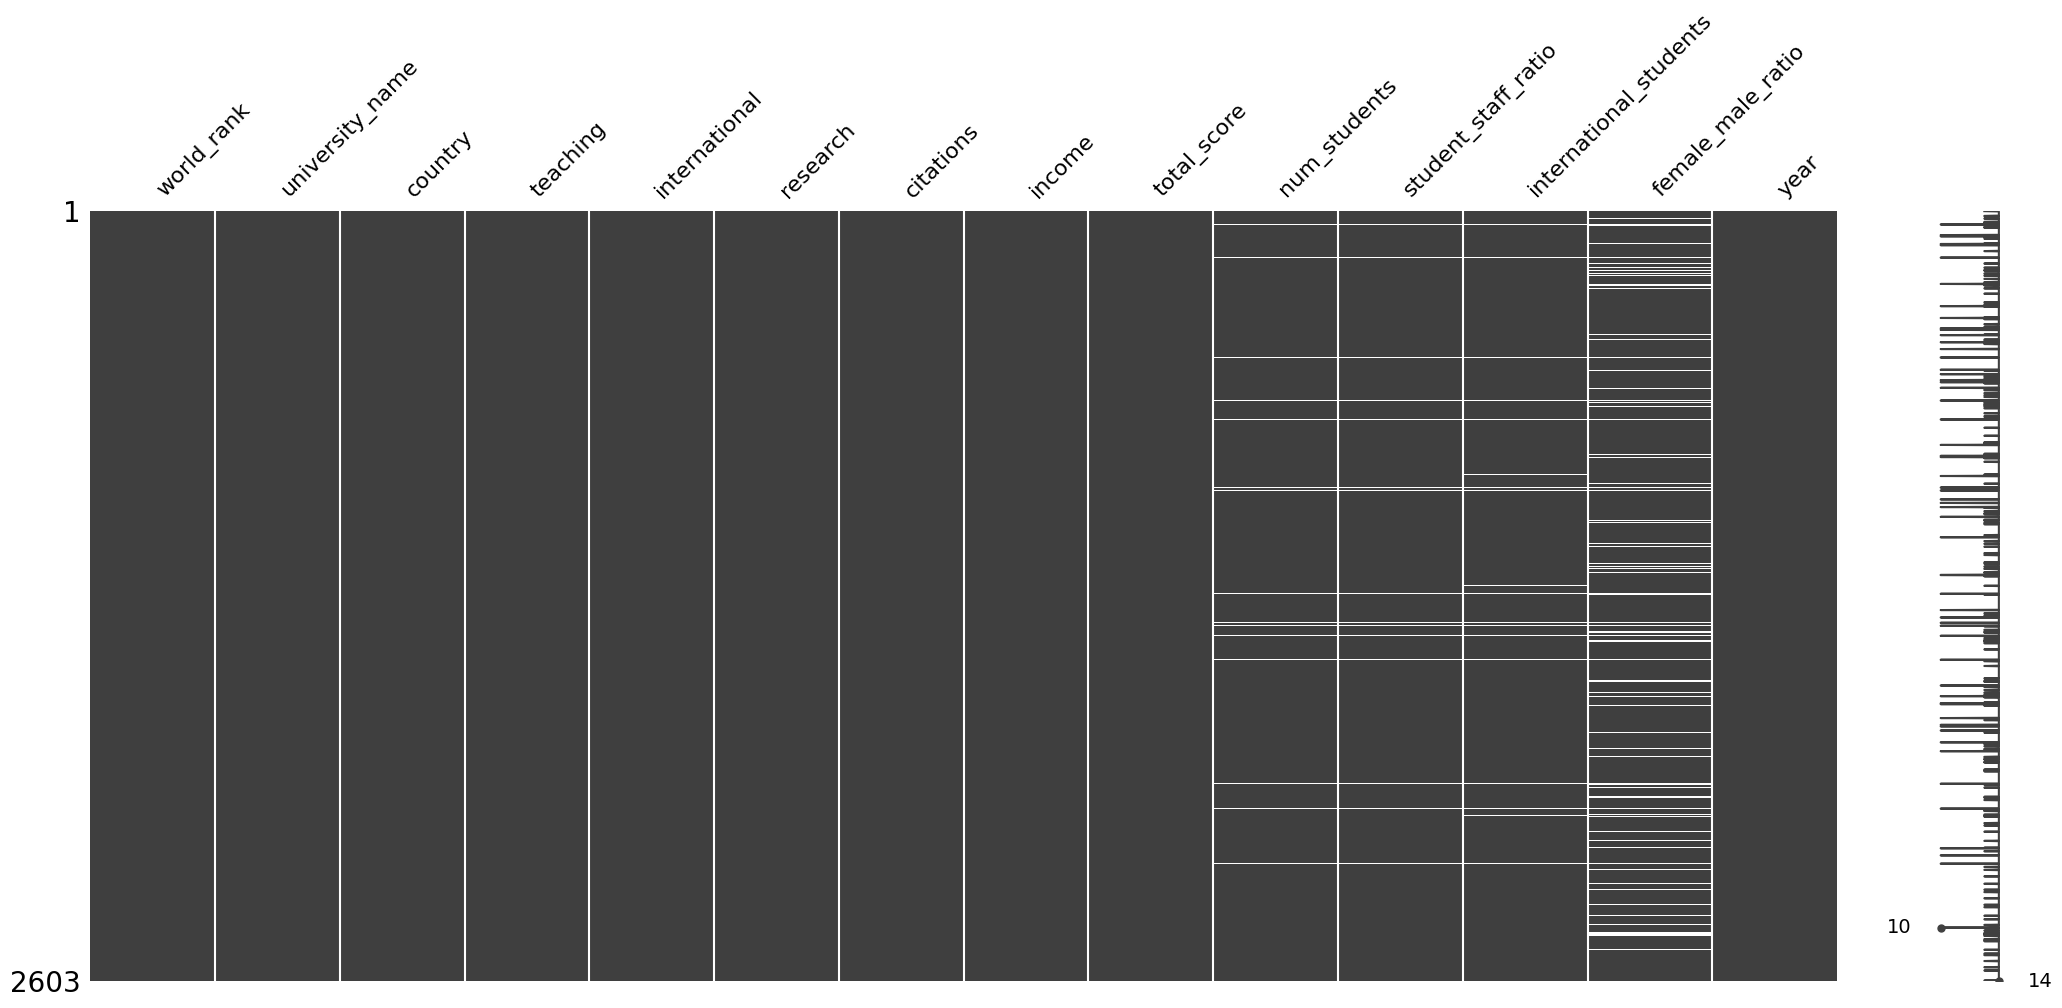

In [9]:
import missingno
missingno.matrix(timesData);

In [10]:
timesData.isnull().sum()

world_rank                  0
university_name             0
country                     0
teaching                    0
international               0
research                    0
citations                   0
income                      0
total_score                 0
num_students               59
student_staff_ratio        59
international_students     67
female_male_ratio         233
year                        0
dtype: int64

In [11]:
df = timesData.iloc[:100, :]
df.shape

(100, 14)

In [12]:
import plotly.graph_objs as go

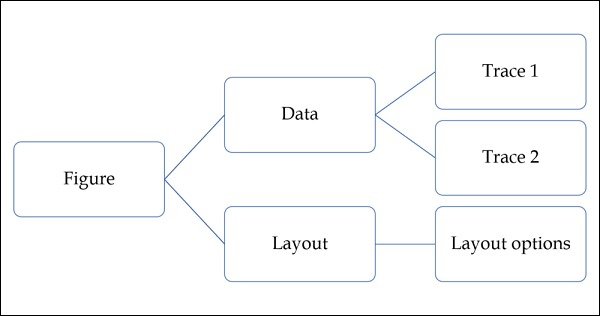

Bu görsel plotly de figure şemasını göstermektedir.

In [13]:
#plt.style.use("ggplot")
# creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Bu dağılım izi için çizim modunu belirler. "mode=text" ise text'i yazdırır "text" öğeleri koordinatlarda görünür. 
                                       # Aksi takdirde, fareyle üzerine gelindiğinde "text" öğeleri görünür. 
                                       # 20'den az nokta varsa ve iz yığınlanmamışsa varsayılan değer "lines+markers"dir. Aksi takdirde, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

# creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star", # star, circle, diamond, square, x, cross
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs Work Rank of Top 100 Universities", #axes olarak düşünebiliriz
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  #figure içine yukarıda tanımladığımız grafik değişkenlerini ve layout parametrelerini dict olarak verip 
iplot(fig)                                #iplot(fig) ile çizdiriyoruz.


RGB Renk Kodları: https://www.rapidtables.com/web/color/RGB_Color.html

## Zero Kullanımı

In [14]:
fig = px.line(y=[1, -1], x=[-1,1])

fig.update_xaxes(zeroline=True, zerolinewidth=3, zerolinecolor='rgba(0,255,0,0.5)')
fig.update_yaxes(zeroline=True, zerolinewidth=6, zerolinecolor='rgba(255,165,0,0.5)')

fig.show()

## Ticklen Kullanımı

Seaborn da olduğu gibi plotlyde de içine embed veri setleri var. Bunlardan çalışalım biraz ülkelerin popülasyonu ile ilgili bir veri seti çağıracağız.

data setleri hakkında kısa bilgi için "http://plotly.github.io/datasets/

In [15]:
dataset_list = dir(px.data) # içinde gomulu olan data sertlerini görmel için.
print(dataset_list)

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'absolute_import', 'carshare', 'election', 'election_geojson', 'experiment', 'gapminder', 'iris', 'medals_long', 'medals_wide', 'stocks', 'tips', 'wind']


In [16]:
df = px.data.iris() # sadece cagıracağın dosyanınn adını yazmöan yeterli.

fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species") #facet_col; unıque değerler kadar sonuç döndurur. 
fig.update_xaxes(ticks="inside", tickwidth=4, tickcolor='yellow', ticklen=20)
fig.update_yaxes(ticks="outside", tickwidth=2, tickcolor='crimson', ticklen=10, col=1) 

fig.show()

In [17]:
dataset = sns.load_dataset('tips')

dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


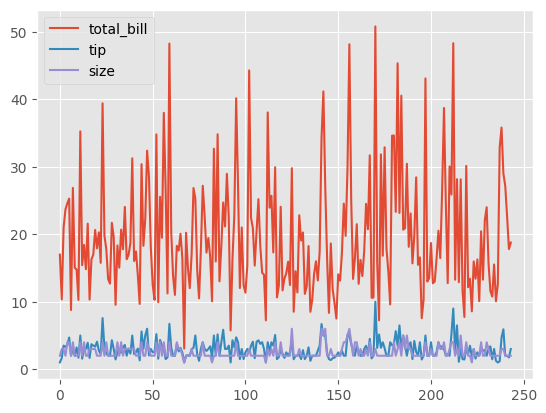

In [18]:
plt.style.use('ggplot')

dataset2 = dataset[["total_bill", "tip", "size"]]

dataset2.plot();

In [19]:
plt.style.use('ggplot')

dataset2 = dataset[["total_bill", "tip", "size"]]

dataset2.iplot();

# Scatter Plot

In [20]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]  # iloc ile indexleme yaparak istediğimiz yıllara ait verileri yeni df olarak oluşturuyoruz.  
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

In [21]:
# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)

# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)

# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

## Bar Charts

Datamız yıllara sari olarak ülke bilgilerini içeriyor

LifeExp=Ortalama Ömür

pop = popülasyon

gdpPercap = kişi başı gelir yıllık yada kişi alım gücü

iso_num = ülkenin numarası

In [22]:
gm = px.data.gapminder()
gm

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [23]:
gm_usa = px.data.gapminder().query("country =='United States'")

fig = px.bar(gm_usa, x="year", y="pop")

fig.update_xaxes(tickmode="linear", tick0=1952, dtick=5)
# fig.update_yaxes(dtick=20000000)  

fig.show()

In [24]:
df_europe = px.data.gapminder().query("continent =='Europe' and year == 2007 and pop > 5.e6" )

fig = px.bar(df_europe, y= "pop", x= "country", text = "pop", color ="pop")

fig.update_traces(textposition = "outside", texttemplate = "%{text:.3s}", textfont_size=12) #int, s, f verdiğimizde type göre işlem yapıyor

fig.update_layout(xaxis_tickangle = -45,
                  font_family="Arial",
                  font_color="red",
                  font_size = 12)

## Pie Chart

In [25]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

df = df2016.num_students

df.count()

7

In [26]:
df

1803     2,243
1804    19,919
1805    15,596
1806    18,812
1807    11,074
1808    20,152
1809     7,929
Name: num_students, dtype: object

In [27]:
df1 = (df.str.replace(",", "")).astype("float")

In [28]:
df1

1803     2243.0
1804    19919.0
1805    15596.0
1806    18812.0
1807    11074.0
1808    20152.0
1809     7929.0
Name: num_students, dtype: float64

In [29]:
df2 = list((df.str.replace(",", "")).astype("float"))

In [30]:
df2

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [31]:
pie_list =[float(each.replace(",", ""))for each in df2016.num_students]
pie_list

[2243.0, 19919.0, 15596.0, 18812.0, 11074.0, 20152.0, 7929.0]

In [32]:
labels = df2016.university_name
# figure
fig = {
    "data" : [
        {
            "values" : pie_list,
            "labels" : labels,
            "domain" : {"x": [0, 0.5]},# grafıgın hangı alanda yer alacagını ayarlar.
            "name" : "Number of Students Rates",
            "hoverinfo" : "label+percent", # label+value+percent, label, value
            "hole" : .2, #ortadakı boslugu ayarlar
            "type" : "pie",
            "pull" : [0,0,0,0,0, 0.2, 0.2] #exploded
        },
    ],
    "layout" : {
        "title" : "Universites Number of Students Rates",
        "annotations" : [
            {"font" : {"size" : 20},
             "text" : "Number of Students",
             "x" : 0.3,
             "y" : 1
            },
        ]
    }
}
iplot(fig)

In [33]:
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 10.e6, 'country'] = 'Other countries' # Represent only large countries

fig = px.pie(df, values='pop', names='country', title='Population of European continent')

fig.show()

## Bubble Chart

In [34]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]

num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]
num_students_size

[2.243,
 19.919,
 15.596,
 18.812,
 11.074,
 20.152,
 7.929,
 15.06,
 18.178,
 14.221,
 15.128,
 11.751,
 36.186,
 26.607,
 25.055,
 38.206,
 20.376,
 21.424,
 66.198,
 15.172]

In [35]:
df2016.international

international_color = [float(each) for each in df2016.international]

data = [
    {
        "y" : df2016.teaching,
        "x" : df2016.world_rank,
        "mode" : "markers",     #  <--  lines; markers+lines da kullanılabılır.
        "marker" : {
            "color" : international_color,
            "size" : num_students_size,
            "showscale" : True
        },
        "text" : df2016.university_name
    }
]
iplot(data)

In [36]:
df = px.data.gapminder()

fig = px.scatter(df.query("year==2007"), x = "gdpPercap", y = "lifeExp",
                size = "pop", color = "continent", 
                 hover_name = "country", log_x = True, size_max = 50)

fig

## Map 

In [37]:
df = px.data.carshare()

df.head(3)

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20


In [38]:
df = px.data.carshare()

fig = px.scatter_mapbox(df, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="open-street-map")
fig.show()

# open-street-map, stamen-terrain, stamen-toner, carto-positron, white-bg, carto-darkmatter"

In [39]:
df_6 = px.data.gapminder()

fig = px.scatter_geo(df_6, locations="iso_alpha", color="continent", hover_name="country", size="pop",
               animation_frame="year", projection="orthographic", size_max = 100)
fig.show()

# equirectangular, mercator, orthographic, kavrayskiy7, robinson, miller, natural earth

## WordCloud

In [40]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [41]:
x2011 = timesData.country[timesData.year == 2011]
x2011.head()

0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
Name: country, dtype: object

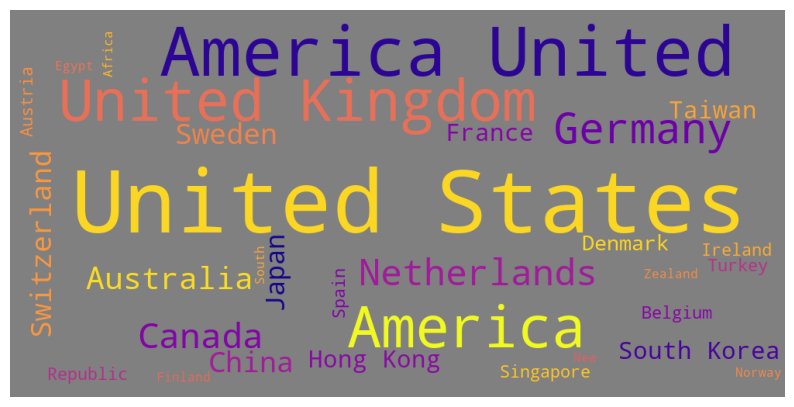

In [42]:
x2011 = timesData.country[timesData.year == 2011]

plt.subplots(figsize = (10, 10))

wordcloud = WordCloud(background_color= "gray",
                      width = 1000,
                      height= 500,colormap="plasma").generate(" ".join(x2011))

plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("graph.png") # save graph in your computer

plt.show()

## 3D Scatter plot

In [43]:
trace1 = go.Scatter3d(
                    x = df2015.world_rank,
                    y = df2015.research,
                    z = df2015.citations,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",symbol='circle'))

data = [trace1]
layout = go.Layout(
                )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [44]:
df_5 = px.data.tips()

In [45]:
import plotly.express as px

fig = px.scatter_3d(df_5, x='size', y='total_bill', z='tip', color='day', symbol='sex')

fig.show()

## Imread

In [46]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



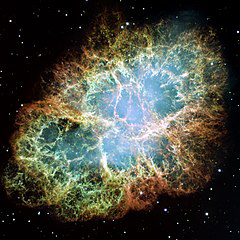

In [3]:
from skimage import io

img = io.imread('https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Crab_Nebula.jpg/240px-Crab_Nebula.jpg')
fig = px.imshow(img)

fig.show()


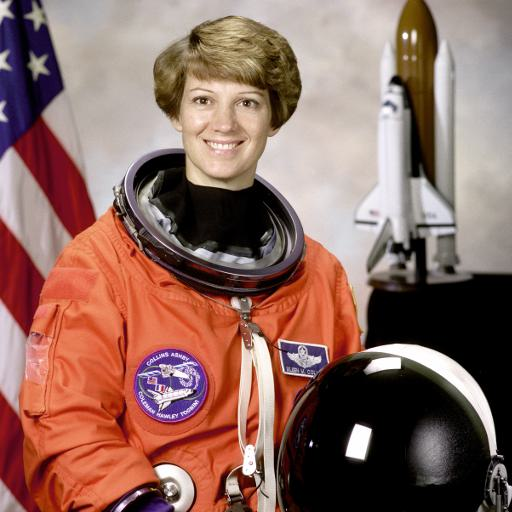

In [5]:
from skimage import data

img = data.astronaut()
fig = px.imshow(img, binary_format="jpeg", binary_compression_level=0)
dosya_yolu = 'C:\\Users\\Hp\\Desktop\\DS_HTML//astronaut.jpg'   # \\ ile çalıştırdım.
io.imsave(dosya_yolu, img)

fig.show()


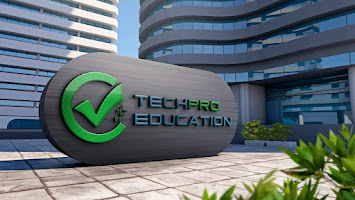

In [6]:
img = io.imread('https://www.google.com/maps/uv?pb=!1s0x89c7651137ee3fa9%3A0xa6aa7c9619d85c2e!3m1!7e115!4shttps%3A%2F%2Flh5.googleusercontent.com%2Fp%2FAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB%3Dw355-h200-k-no!5stechpro%20-%20Google%27da%20Ara!15sCgIgAQ&imagekey=!1e10!2sAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB&hl=tr&sa=X&ved=2ahUKEwil9bXToI_5AhVlXfEDHbC8BrsQoip6BAhJEAM')
fig = px.imshow(img)

fig.show()

In [ ]:
img = io.imread('https://www.google.com/maps/uv?pb=!1s0x89c7651137ee3fa9%3A0xa6aa7c9619d85c2e!3m1!7e115!4shttps%3A%2F%2Flh5.googleusercontent.com%2Fp%2FAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB%3Dw355-h200-k-no!5stechpro%20-%20Google%27da%20Ara!15sCgIgAQ&imagekey=!1e10!2sAF1QipPbXVpdQoJGN9uNBz7yABLaMAMrPhUv8DFQzfjB&hl=tr&sa=X&ved=2ahUKEwil9bXToI_5AhVlXfEDHbC8BrsQoip6BAhJEAM')
fig = px.imshow(img)

fig.show()